## Predicting the Beats-per-Minute of Songs

Problem definition
How well can we predict the Beats-per-Minute of Songs.

## Data
The data is downloaded from the kaggle for playground-series-s5e9: https://www.kaggle.com/competitions/playground-series-s5e9/data

There 3 main datasets:

train.csv - the training dataset; BeatsPerMinute is the continuous target ground truth
test.csv - the test dataset; your objective is to predict the BeatsPerMinute for each row
sample_submission.csv - a sample submission file in the correct format

## Models: 
RandomForestRegressor, GradientBoostingRegressor, XGBOOST

## Evaluation
The evaluation metric for this competition is the RMSE (root mean squared error).

Submissions are evaluated using the Root Mean Squared Error between the predicted and the observed target.

Sample submission files can be downloaded from the data page. Submission files should be formatted as follows:
For each id in the test set, you must predict a continuous-valued BeatsPerMinute. The file should contain a header and have the following format:

ID,BeatsPerMinute

524164,119.5

524165,127.42

524166,111.11
etc.

In [ ]:
## Let's import our tools.. 

import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

## Models From Scikit-learn
from sklearn.ensemble import RandomForestClassifier ## (since it's a classification problem)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [32]:
## import training set
df_train = pd.read_csv("train.csv", low_memory=False)
df_test = pd.read_csv("test (1).csv", low_memory=False)
df_sub= pd.read_csv("sample_submission.csv", low_memory=False)

In [33]:
df_train.head()

,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
0,0,0.603610,-7.636942,0.023500,0.000005,0.000001,0.051385,0.409866,290715.6450,0.826267,147.53020
1,1,0.639451,-16.267598,0.071520,0.444929,0.349414,0.170522,0.651010,164519.5174,0.145400,136.15963
2,2,0.514538,-15.953575,0.110715,0.173699,0.453814,0.029576,0.423865,174495.5667,0.624667,55.31989
3,3,0.734463,-1.357000,0.052965,0.001651,0.159717,0.086366,0.278745,225567.4651,0.487467,147.91212
4,4,0.532968,-13.056437,0.023500,0.068687,0.000001,0.331345,0.477769,213960.6789,0.947333,89.58511


In [34]:
df_train.describe()

,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
count,347029.000000,347029.000000,347029.000000,347028.000000,347028.000000,347028.000000,347028.000000,347028.000000,347028.000000,347028.000000,347028.000000
mean,173514.000000,0.633010,-8.381813,0.074445,0.262731,0.117757,0.178520,0.555553,241905.121642,0.500769,119.055116
std,100178.787621,0.157029,4.617202,0.049975,0.223206,0.132003,0.118099,0.225348,59307.763513,0.289857,26.467414
min,0.000000,0.158827,-27.509725,0.023500,0.000005,0.000001,0.024300,0.025600,63973.000000,0.000067,46.718000
25%,86757.000000,0.515818,-11.553728,0.023500,0.069298,0.000001,0.077688,0.403854,207098.896575,0.255067,101.072330
50%,173514.000000,0.634792,-8.255907,0.066425,0.242449,0.074202,0.166465,0.564522,243678.644850,0.511800,118.781070
75%,260271.000000,0.739179,-4.912298,0.107313,0.396777,0.204501,0.268979,0.716273,281857.206800,0.745867,136.698000
max,347028.000000,0.975000,-1.357000,0.256401,0.995000,0.869258,0.584792,0.978000,464723.228100,1.000000,206.037000


In [35]:
## Let's see the columns names in our train dataset..
df_train.columns

Index(['id', 'RhythmScore', 'AudioLoudness', 'VocalContent', 'AcousticQuality',
       'InstrumentalScore', 'LivePerformanceLikelihood', 'MoodScore',
       'TrackDurationMs', 'Energy', 'BeatsPerMinute'],
      dtype='object')

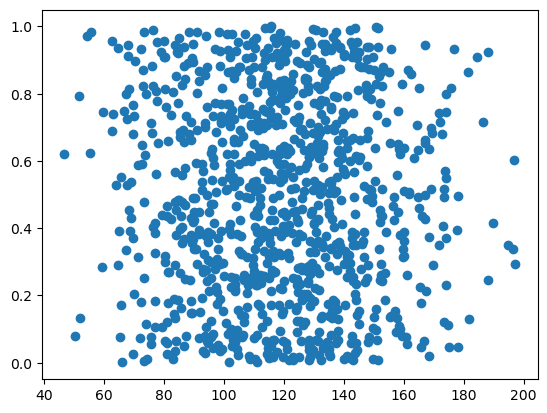

In [36]:
## Let's visualize beatsperminute and energy scatter

fig, ax = plt.subplots()
ax.scatter(df_train["BeatsPerMinute"][:1000], df_train["Energy"][:1000])
plt.show();

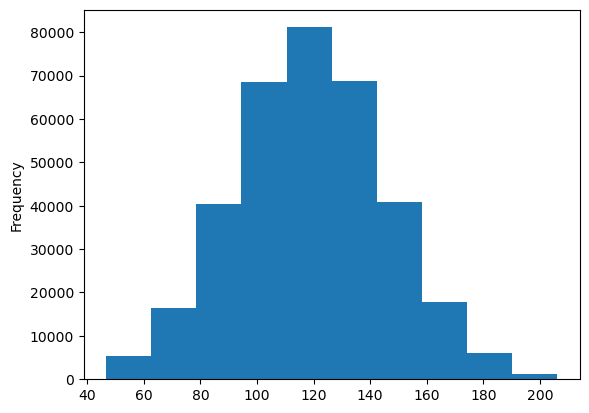

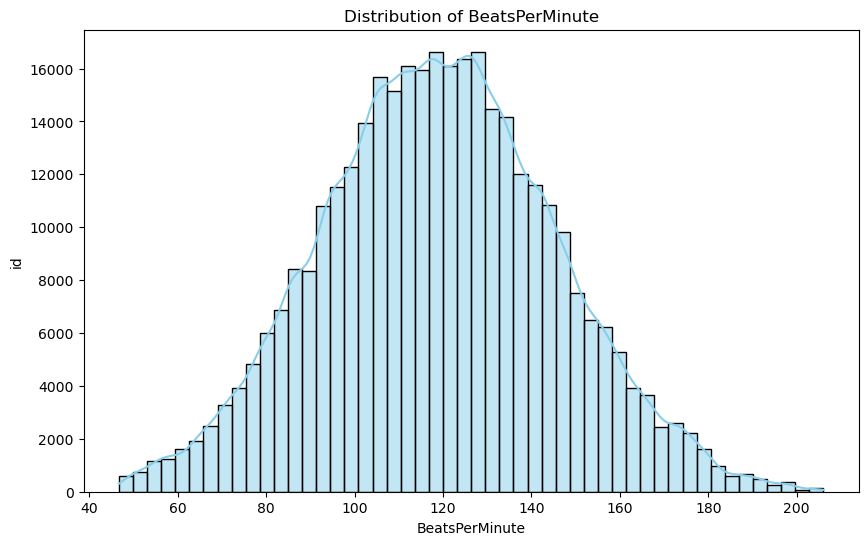

In [37]:
## Let's visualize beatsperminute alone using histogram chat
df_train.BeatsPerMinute.plot.hist()


plt.figure(figsize=(10, 6))
sns.histplot(df_train['BeatsPerMinute'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of BeatsPerMinute')
plt.xlabel('BeatsPerMinute')
plt.ylabel('id')
plt.show()

In [38]:
## Let's check the 1st 1000 rows of beatsperminutes with its data type (dtype) which will help to know if it is float or int 
df_train.BeatsPerMinute[:1000]

0      147.53020
1      136.15963
2       55.31989
3      147.91212
4       89.58511
         ...    
995    129.91451
996    107.70242
997     69.05056
998    143.72538
999     76.00527
Name: BeatsPerMinute, Length: 1000, dtype: float64

In [39]:
## Let's view our data frame of train,csv file differently by transposing it .. using df.head().T (T means Transpose)
df_train.head().T

,0,1,2,3,4
id,0.000000,1.000000,2.000000,3.000000,4.000000
RhythmScore,0.603610,0.639451,0.514538,0.734463,0.532968
AudioLoudness,-7.636942,-16.267598,-15.953575,-1.357000,-13.056437
VocalContent,0.023500,0.071520,0.110715,0.052965,0.023500
AcousticQuality,0.000005,0.444929,0.173699,0.001651,0.068687
InstrumentalScore,0.000001,0.349414,0.453814,0.159717,0.000001
LivePerformanceLikelihood,0.051385,0.170522,0.029576,0.086366,0.331345
MoodScore,0.409866,0.651010,0.423865,0.278745,0.477769
TrackDurationMs,290715.645000,164519.517400,174495.566700,225567.465100,213960.678900
Energy,0.826267,0.145400,0.624667,0.487467,0.947333


In [40]:
## Let's check beats per miunt 1st 50 heads
df_train.BeatsPerMinute.head(50)

0     147.53020
1     136.15963
2      55.31989
3     147.91212
4      89.58511
5     151.43602
6     151.63439
7     123.31545
8     133.59806
9     117.39790
10    131.35937
11    132.55244
12    137.28701
13    143.72538
14    145.92435
15    119.94727
16    151.17802
17     95.88081
18    103.48320
19     86.07513
20    148.24284
21    145.20788
22     80.24409
23    121.66038
24    152.61827
25    143.18457
26    120.60487
27     94.42650
28    117.07434
29     86.68904
30    131.57660
31     89.04680
32    159.64580
33    137.98394
34     93.82487
35    134.50628
36    105.21575
37    143.77942
38    137.74948
39    131.35937
40    131.60905
41    105.74492
42    119.62015
43     87.49651
44    127.97991
45    135.13675
46    120.00314
47    101.33914
48     91.87798
49     77.81766
Name: BeatsPerMinute, dtype: float64

In [41]:
## Let's check beatspermiunte value count
df_train.BeatsPerMinute.value_counts()

BeatsPerMinute
103.80132    58
99.74389     54
117.07771    48
112.34526    47
126.87884    47
             ..
145.32991     9
187.56672     9
150.32182     9
160.30977     8
102.07632     8
Name: count, Length: 14622, dtype: int64

In [42]:
## Let's check if all data type in our train.csv is float
df_train.dtypes

id                             int64
RhythmScore                  float64
AudioLoudness                float64
VocalContent                 float64
AcousticQuality              float64
InstrumentalScore            float64
LivePerformanceLikelihood    float64
MoodScore                    float64
TrackDurationMs              float64
Energy                       float64
BeatsPerMinute               float64
dtype: object

Good, all columns in our train dataset are all float (numbers or numeric) already.  

In [43]:
## Lewt's check for missing values in train dataframe.
df_train.isna().sum()

id                           0
RhythmScore                  0
AudioLoudness                0
VocalContent                 1
AcousticQuality              1
InstrumentalScore            1
LivePerformanceLikelihood    1
MoodScore                    1
TrackDurationMs              1
Energy                       1
BeatsPerMinute               1
dtype: int64

No missing values in our train data.. 

In [44]:
## Let's check for miss values 
## Lewt's check the missing values from the  dataframe.
df_train.isnull()

,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
347024,False,False,False,False,False,False,False,False,False,False,False
347025,False,False,False,False,False,False,False,False,False,False,False
347026,False,False,False,False,False,False,False,False,False,False,False
347027,False,False,False,False,False,False,False,False,False,False,False


In [45]:
## Let's extract and check the columns with the above missions values in our train data
## Check which numeric columns have null values
for label, content in df_train.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)   ## this will tell us which columns have 'Null' values

VocalContent
AcousticQuality
InstrumentalScore
LivePerformanceLikelihood
MoodScore
TrackDurationMs
Energy
BeatsPerMinute


In [46]:
## Let's see our Test dataset.. 
df_test.head().T

,0,1,2,3,4
id,524164.000000,524165.000000,524166.000000,524167.000000,524168.000000
RhythmScore,0.410013,0.463071,0.686569,0.885793,0.637391
AudioLoudness,-16.794967,-1.357000,-3.368928,-5.598049,-7.068160
VocalContent,0.023500,0.141818,0.167851,0.118488,0.126099
AcousticQuality,0.232910,0.057725,0.287823,0.000005,0.539073
InstrumentalScore,0.012689,0.257942,0.210915,0.376906,0.068950
LivePerformanceLikelihood,0.271585,0.097624,0.325909,0.134435,0.024300
MoodScore,0.664321,0.829552,0.304978,0.487740,0.591248
TrackDurationMs,302901.549800,221995.664300,357724.012700,271790.398900,277728.538300
Energy,0.424867,0.846000,0.134067,0.316467,0.481067


In [47]:
## Let's check for mising values
df_test.isna().sum()

id                           0
RhythmScore                  0
AudioLoudness                0
VocalContent                 0
AcousticQuality              0
InstrumentalScore            0
LivePerformanceLikelihood    0
MoodScore                    0
TrackDurationMs              0
Energy                       0
dtype: int64

No missing values in our test dataset

In [48]:
## Let's check for non numeric content oe columns for our test_csv data
df_test.isnull()

,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
174717,False,False,False,False,False,False,False,False,False,False
174718,False,False,False,False,False,False,False,False,False,False
174719,False,False,False,False,False,False,False,False,False,False
174720,False,False,False,False,False,False,False,False,False,False


In [49]:
## Check which numeric columns have null values
for label, content in df_test.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)   ## this will tell us which columns have 'Null' values

## If nothing display it means None.

In [50]:
## Let's turn them into numbers and fill all the missing vlues for both train and test dataset

for (label, content), (label2, content2) in zip(df_train.items(), df_test.items()):  
    if not pd.api.types.is_numeric_dtype(content):
        ## Add a binary column to indicate whether the sample has missing values
        df_train[label + "is_missing"], df_test[label + "is_missing"] = pd.isnull(content), pd.isnull(content)
        ## Turn categories into numbers and add+1
        df_train[label] = pd.Categorical(content).codes+1
        df_test[label] = pd.Categorical(content).codes+1
        print(label)

In [51]:
# Check for NaNs in the target variable
df_train['BeatsPerMinute'].isna().sum()
print("Number of NaNs in BeatsPerMinute:") 

Number of NaNs in BeatsPerMinute:


In [52]:
df_train.head().T

,0,1,2,3,4
id,0.000000,1.000000,2.000000,3.000000,4.000000
RhythmScore,0.603610,0.639451,0.514538,0.734463,0.532968
AudioLoudness,-7.636942,-16.267598,-15.953575,-1.357000,-13.056437
VocalContent,0.023500,0.071520,0.110715,0.052965,0.023500
AcousticQuality,0.000005,0.444929,0.173699,0.001651,0.068687
InstrumentalScore,0.000001,0.349414,0.453814,0.159717,0.000001
LivePerformanceLikelihood,0.051385,0.170522,0.029576,0.086366,0.331345
MoodScore,0.409866,0.651010,0.423865,0.278745,0.477769
TrackDurationMs,290715.645000,164519.517400,174495.566700,225567.465100,213960.678900
Energy,0.826267,0.145400,0.624667,0.487467,0.947333


In [53]:
df_test.head().T

,0,1,2,3,4
id,524164.000000,524165.000000,524166.000000,524167.000000,524168.000000
RhythmScore,0.410013,0.463071,0.686569,0.885793,0.637391
AudioLoudness,-16.794967,-1.357000,-3.368928,-5.598049,-7.068160
VocalContent,0.023500,0.141818,0.167851,0.118488,0.126099
AcousticQuality,0.232910,0.057725,0.287823,0.000005,0.539073
InstrumentalScore,0.012689,0.257942,0.210915,0.376906,0.068950
LivePerformanceLikelihood,0.271585,0.097624,0.325909,0.134435,0.024300
MoodScore,0.664321,0.829552,0.304978,0.487740,0.591248
TrackDurationMs,302901.549800,221995.664300,357724.012700,271790.398900,277728.538300
Energy,0.424867,0.846000,0.134067,0.316467,0.481067


In [54]:
## Let's define or select our features and target from the columns 
df_train_clean = df_train.dropna(subset=['BeatsPerMinute'])

features = ['RhythmScore', 'AudioLoudness', 'VocalContent', 'AcousticQuality', 
            'InstrumentalScore', 'LivePerformanceLikelihood', 'MoodScore', 
            'TrackDurationMs', 'Energy']
target = 'BeatsPerMinute'

## Modeling

In [55]:
## Let's Prepare our training data
X = df_train_clean[features]
y = df_train_clean[target]
X_test = df_test[features]

# Let's create preprocessing pipeline for features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, features)
    ])

# Let's define or select models to try
models = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': xgb.XGBRegressor(random_state=42),
    'ElasticNet': ElasticNet(random_state=42)
}

# Let's split training data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Let's create a function to evaluate our models
def evaluate_model(model, X_train, y_train, X_val, y_val):
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    return mse, mae, r2

# Let's evaluate each model
results = {}
for name, model in models.items():
    mse, mae, r2 = evaluate_model(model, X_train, y_train, X_val, y_val)
    results[name] = {'MSE': mse, 'MAE': mae, 'R2': r2}
    print(f"{name} - MSE: {mse:.2f}, MAE: {mae:.2f}, R2: {r2:.2f}")

RandomForest - MSE: 717.28, MAE: 21.44, R2: -0.02
GradientBoosting - MSE: 703.72, MAE: 21.23, R2: 0.00
XGBoost - MSE: 712.36, MAE: 21.37, R2: -0.01
ElasticNet - MSE: 703.98, MAE: 21.24, R2: -0.00


## Hyperparameter Tuning with XGBoost

In [56]:

param_grid = {
    'model__n_estimators': [100, 200],
    'model__learning_rate': [0.01, 0.1],
    'model__max_depth': [3, 5]
}

pipeline = Pipeline(steps=[('preprocessor', preprocessor), 
                          ('model', xgb.XGBRegressor(random_state=42))])

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['RhythmScore',
                                                                          'AudioLoudness',
                                                                          'VocalContent',
                                                                          'AcousticQuality',
                                                                          'InstrumentalScore',
                                                                          'LivePerformanceLikelihood',
                                                                          'MoodScore',
                                                                          'TrackDurationMs',
                                                                          'Energy'])])),
                                       ('model',
                                        XGBRegressor...
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=42, ...))]),
             n_jobs=-1,
             param_grid={'model__learning_rate': [0.01, 0.1],
                         'model__max_depth': [3, 5],
                         'model__n_estimators': [100, 200]},
             scoring='neg_mean_squared_error')

In [57]:
# Let's see our Best model
best_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

Best parameters: {'model__learning_rate': 0.01, 'model__max_depth': 3, 'model__n_estimators': 200}


## Evaluation

In [58]:
## Let's evaluate best model on validation set
y_pred = best_model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
print(f"Best Model - MSE: {mse:.2f}, MAE: {mae:.2f}, R2: {r2:.2f}")

Best Model - MSE: 703.59, MAE: 21.23, R2: 0.00


### **Make Predictions on Test Dataset

In [59]:
# Predict on test set
test_predictions = best_model.predict(X_test)

In [61]:
test_predictions

array([118.88687, 118.5605 , 119.23746, ..., 119.127  , 118.95454,
       119.06798], dtype=float32)

# Submission preparation 

In [60]:
## Let's prepare for our prediction result submission as directed by the kaggle competition  

df_sub['BeatsPerMinute'] = test_predictions
df_sub.to_csv('submission.csv', index=False)
print("Submission file created: submission.csv")

Submission file created: submission.csv


In [64]:
## Format predictions in the same format kaggle is asking for.. 
## let's make a simple dataframe of to see how it looks like.

df_sub = pd.read_csv('submission.csv', low_memory=False)

In [65]:
df_sub

,id,BeatsPerMinute
0,524164,118.886870
1,524165,118.560500
2,524166,119.237460
3,524167,119.198204
4,524168,119.107300
...,...,...
174717,698881,119.017930
174718,698882,119.225845
174719,698883,119.127000
174720,698884,118.954540
